### GRIP - The Spark Foundations
#### By - Subhasis Pattanayak

### Task - 1 : Predict the percentage of an student based on the no. of study hours. 

#### Steps Followed :-
    1- Reading and understanding the data
    2- Visualising the data
    3- Splitting the data into train and test sets
    4 - Build Linear Regression model
    5 - Predict and Evaluate the model

In [225]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [226]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Step 1- Reading and understanding the data

In [227]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [228]:
# Get the shape of the dataset
data.shape

(25, 2)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [230]:
# Get the summary of the dataframe using 'describe()'
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [231]:
# Checking whether if there is any missing value.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Step 2- Visualising the data


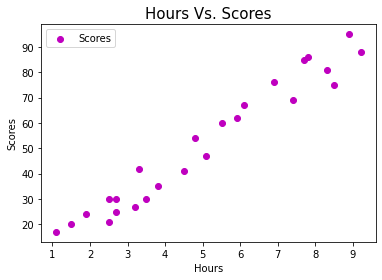

In [232]:
plt.scatter(x = 'Hours', y = 'Scores', color = 'm', data = data)
plt.title('Hours Vs. Scores', fontsize = 15)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [233]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1:].values
X.shape, y.shape

((25, 1), (25, 1))

###   Step 3- Splitting the data into train and test sets

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17, 1), (17, 1), (8, 1), (8, 1))

### Step 4 - Build Linear Regression model


In [235]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Plotting the Best fit Line

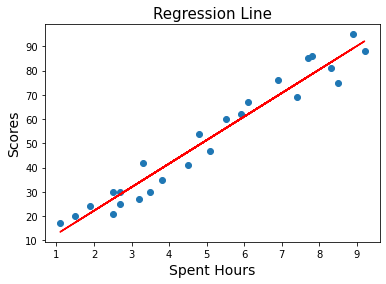

In [236]:
line = model.coef_*X + model.intercept_
plt.scatter(X, y)
plt.plot(X, line, color = 'r')
plt.title('Regression Line', fontsize = 15)
plt.xlabel('Spent Hours', fontsize = 14)
plt.ylabel('Scores', fontsize = 14)
plt.show()

### Making Prediction

In [237]:
# Predicting using train and test set 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Model Evaluation 

In [238]:
print('Train Score', r2_score(y_train, y_train_pred))
print('Test Score', r2_score(y_test, y_test_pred))

Train Score 0.9536486503889446
Test Score 0.9487647340257012


In [239]:
# Creating a DataFrame that contains Actual and Predicted Scores
df = pd.DataFrame({'Hours':X_test[:,0], 'Actual':y_test[:,0], 'Predicted':y_pred[:,0]})
df

,Hours,Actual,Predicted
0,8.3,81,83.391686
1,2.5,30,27.070549
2,2.5,21,27.070549
3,6.9,76,69.796929
4,5.9,62,60.086388
5,2.7,25,29.012657
6,3.3,42,34.838982
7,5.1,47,52.317955


In [240]:
# Predicted Score of a Student who spent 9.5 hours
res = model.predict([[9.5]])
res[0][0]

95.04433557250368

In [241]:
print(model.coef_)
print(model.intercept_)

[[9.71054094]]
[2.79419668]


### Conclusion --
- Hours and Scores positively correlated.
- when the number of hours increases the scores is increases 9.7105(model coefficients) times in addition with 2.7941(model intercept)